Import all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducing the problem

[Data source](https://github.com/Prasanna1991/DHCD_Dataset/blob/master/dataset/dataset.npz)

In [2]:
data = np.load("../data/raw/dataset.npz")

In [3]:
train_x, train_y, test_x, test_y = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [4]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(78200, 32, 32)
(78200,)
(13800, 32, 32)
(13800,)


1 to 36 is क, ख... 37 to 46 is ० to ९

## क vs ख

In [5]:
train_y_series = pd.Series(train_y)
test_y_series = pd.Series(test_y)

In [6]:
train_ka = train_x[train_y_series[train_y_series == 1].index]
test_ka = test_x[test_y_series[test_y_series == 1].index]
train_kha = train_x[train_y_series[train_y_series == 2].index]
test_kha = test_x[test_y_series[test_y_series == 2].index]

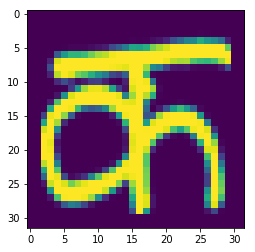

In [7]:
plt.imshow(train_ka[0])

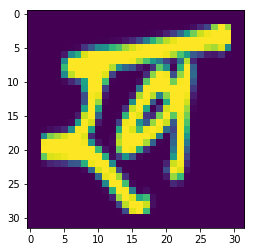

In [8]:
plt.imshow(train_kha[0])

In [9]:
X = np.concatenate([train_ka.reshape(1700, 1024), train_kha.reshape(1700, 1024)]) 
y = np.concatenate([np.ones(1700), np.zeros(1700)])

In [10]:
X_test = np.concatenate([test_ka.reshape(300, 1024), test_kha.reshape(300, 1024)]) 
y_test = np.concatenate([np.ones(300), np.zeros(300)])

In [11]:
X = X / 255
X_test = X_test / 255

## Logistic Regression

$$
p = \frac{1}{1 + \exp{(-(Wx + b))}}
$$


In [27]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(i % 100 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [28]:
model = LogisticRegression(lr=0.1, num_iter=1000)
model.fit(X, y)


loss: 0.5715028771154615 	
loss: 0.10976970220190248 	
loss: 0.09002493464499085 	
loss: 0.08084294032503096 	
loss: 0.07508409179478967 	
loss: 0.07095454992152178 	
loss: 0.06775927928866105 	
loss: 0.06516253324444694 	
loss: 0.06297870040771754 	
loss: 0.06109535738094114 	


In [29]:
model.predict_prob(X)

array([9.98103059e-01, 9.35457012e-01, 9.98809918e-01, ...,
       1.84403474e-01, 8.21808826e-04, 9.56710147e-01])

In [30]:
pred=model.predict(X_test,0.5)

In [31]:
accuracy_score(pred,y_test)

0.9766666666666667